In [512]:
import pandas as pd
dataSet=pd.read_csv('insurance.csv')
print(dataSet)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [513]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

dataSet['sex']=encoder.fit_transform(dataSet['sex'])

dataSet['smoker']=encoder.fit_transform(dataSet['smoker'])

dataSet['region']=encoder.fit_transform(dataSet['region'])


x_data=dataSet.drop(['charges'],axis=1).values
y_data=dataSet['charges'].values

print(x_data)
print(y_data)


[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [514]:
# from sklearn.model_selection import train_test_split 
# X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [515]:
import numpy as np

def fit(X,y,numOfIteration,learning_rate):
    n_samples,n_features=X.shape
    #initalize the weights and bias to zero
    weights=np.zeros((n_features,1))
    bias=0

    for _ in range(numOfIteration):
        # set the equation of the linear regression by multiply the weights to the X_trained_scaled
        y_pred=np.dot(X,weights) +bias

        # get the gradient of the weights and bias

        dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
        dp=(1/n_samples) * np.sum(y_pred-y)
        # update the weigths and bias in every iteration
        weights-=learning_rate*dw
        bias-=learning_rate*dp

    return weights,bias

def predict(X,weights,bias):
    # get the predict value of the model
    y_pred=np.dot(X,weights) + bias
    return y_pred
  
# normalize function applied to use it to make fit_transform of the x_data and y_data and make the length of the featured  data is one
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalize = ((X - mean) / std)
    return normalize 

0.750737199500259
322628699.2772161
322628699.2772161


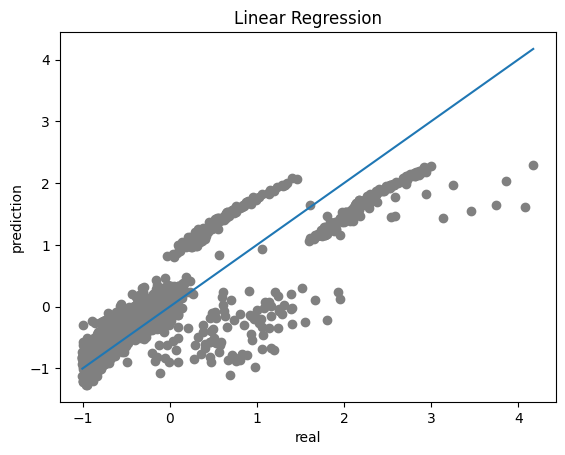

In [516]:
x_train_scaled= normalize(x_data)
x_test_scaled= normalize(y_data.reshape(-1,1))

weights, bias = fit(x_train_scaled, x_test_scaled,numOfIteration=1000,learning_rate=0.01)
# get the weights and bias to get the predict data
y_pred = predict(x_train_scaled, weights, bias)

from sklearn.metrics import mean_squared_error,r2_score

# get the score and mean squared error of the model 
scoring=r2_score(x_test_scaled,y_pred)
mean_square_error=mean_squared_error(y_data,y_pred)

print(scoring)
print(mean_square_error)

import matplotlib.pyplot as plt

plt.scatter(x_test_scaled, y_pred, color='gray')
plt.plot([min(x_test_scaled), max(x_test_scaled)], [min(x_test_scaled), max(x_test_scaled)])
plt.xlabel('real')
plt.ylabel('prediction')
plt.title('Linear Regression')
plt.show()